# Behaviourplots
KPI:
- Cost of Illness
- Contaminated chicken meat
- DALY

TODO:
- better kinds of plots for the yearly KPIs (COI and Daly)
- fix ticks for plots of contaminated meat
- include base run

In [ ]:
# What scenarios do u want plotted from policy?
scenarios = ["base", "1", "11"]

# What scenarios from base?
base_scenarios = ["base", "4", "6"]

In [ ]:
#What's the name of ur file?
loc = "fe_data"

In [ ]:
#What's ur policy called?
policy = "Fly exposure"

## Everything below only needs to be run

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
from enum import Enum

In [21]:
namedict = {"base": "base",
            "1": "fart1",
            "2": "fart2",
            "3": "fart3",
            "4": "fart4",
            "5": "fart5",
            "6": "fart6",
            "7": "fart7",
            "8": "fart8",
            "9": "fart9",
            "10": "fart10",
            "11": "fart11",
            "12": "fart12"}

class DATA(Enum):
    COI = "Cost of Illness"
    DALY = "DALY"
    MEAT = "contaminated meat"

In [6]:
def _processing(df):
    global scenarios, namedict
    df = df.loc[df.index.str.split("_").str[-1].isin(scenarios)].T
    df.columns = df.columns.to_series().apply(lambda value: namedict[value.split("_")[-1]])
    df.index =df.index.astype("float")
    return df
    
def _coi_processing(df):
    df = _processing(df)
    # get each year
    df = df[df.index % 1 == 0].copy()
    # only care about the difference
    return df.diff(axis=0)

def _meat_processing(df):
    df = _processing(df)
    #for truncation
    return df.groupby(np.arange(len(df))//4, as_index=False).mean()

def data_processing(loc):
    location = "../data/" + loc + ".txt"
    df = pd.read_csv(location, delimiter="\t", dtype="string")
    df = df.iloc[:, :-1]
    # Ok, so as we all know Python is retarded when it comes to memory allocation, which means we have to resort ugly constructs like this
    # C++ for the win
    temp = df.iloc[:, 1:].applymap(lambda value: float(value.replace("M",'')) * 1000000 if "M" in value else value)
    temp = temp.apply(pd.to_numeric)
    df = pd.concat([df.iloc[:, 0], temp], axis=1)
    #df = pd.DataFrame(df.iloc[:,0]).join(temp)
    df.set_index("Date", inplace=True)
    return df

def get_data(DATA, df):
    df = pd.DataFrame(df.loc[data_df.index.str.contains(DATA.value)])
    if DATA in [DATA.COI, DATA.DALY]:
        return _coi_processing(df)
    else:
        return _meat_processing(df)

In [7]:
# Because we like colour consistency
simulcmap = "viridis"
cmap = plt.cm.get_cmap(simulcmap, len(namedict))
cmapcolors = cmap(range(len(namedict)))
L = [list(cmapcolors[int(x)]) if x != "base" else list(cmapcolors[0]) for x in scenarios]
colors = np.array(L)

In [8]:
data_df = data_processing(loc)

In [9]:
base_df = data_processing("00_data")

## Cost of Illness

In [10]:
policy_coi = get_data(DATA.COI, data_df)
base_coi = get_data(DATA.COI, base_df)

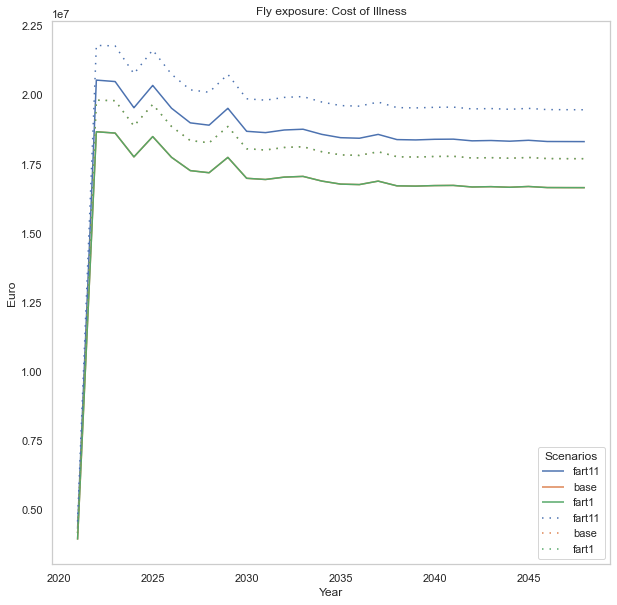

In [11]:
fig, ax = plt.subplots(figsize = (10,10)) 

sns.lineplot(data=policy_coi[2021:], color=colors, dashes=[(1, 0)] * len(scenarios) )
sns.lineplot(data=base_coi[2021:], color=colors, dashes=[(1, 4)] * len(base_scenarios))

plt.xlabel('Year'); plt.ylabel('Euro')
plt.title(policy + ': Cost of Illness')
plt.legend(title="Scenarios")
ax.grid(False)

plt.savefig("../images/" + loc[:2] + "_coi.png", dpi=300, bbox_inches='tight')
plt.show()

## Contaminated chicken meat

In [12]:
policy_meat = get_data(DATA.MEAT, data_df)
base_meat = get_data(DATA.MEAT, base_df)

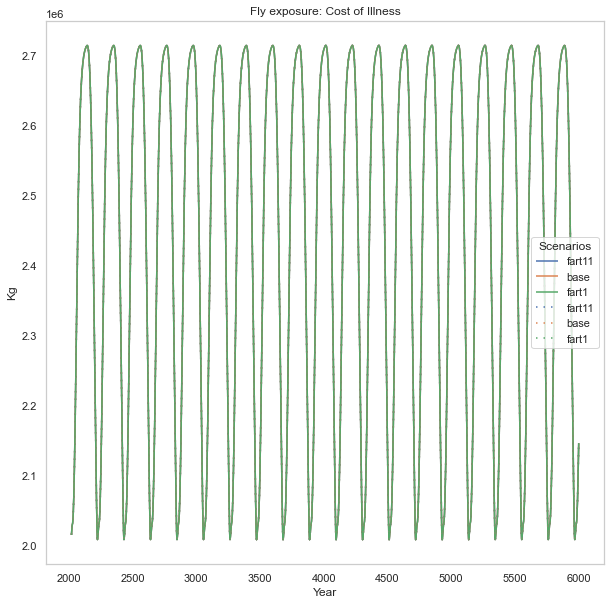

In [13]:
fig, ax = plt.subplots(figsize = (10,10)) 

sns.lineplot(data=policy_meat[2021:], color=colors, dashes=[(1, 0)] * len(scenarios) )
sns.lineplot(data=base_meat[2021:], color=colors, dashes=[(1, 4)] * len(base_scenarios))

plt.xlabel('Year'); plt.ylabel('Kg')
plt.title(policy + ': Cost of Illness')
plt.legend(title="Scenarios")
ax.grid(False)
plt.savefig("../images/" + loc[:2] + "_meat.png", dpi=300, bbox_inches='tight')
plt.show()

## DALY

In [22]:
policy_daly = get_data(DATA.DALY, data_df)
base_daly = get_data(DATA.DALY, base_df)

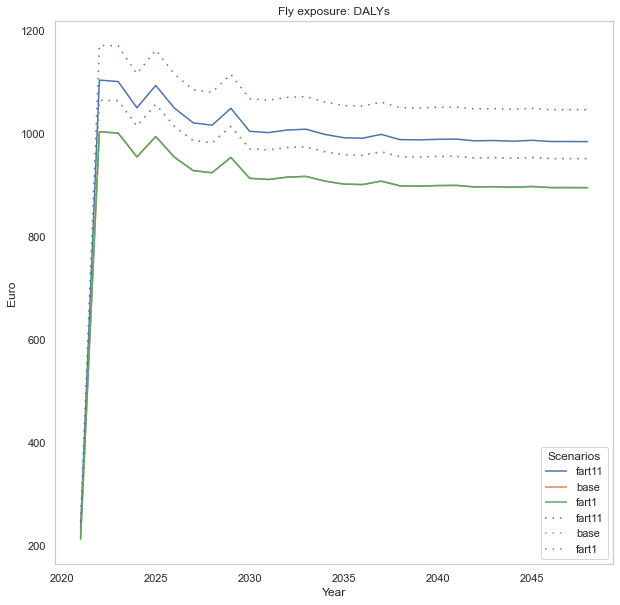

In [23]:
fig, ax = plt.subplots(figsize = (10,10)) 

sns.lineplot(data=policy_daly[2021:], color=colors, dashes=[(1, 0)] * len(scenarios) )
sns.lineplot(data=base_daly[2021:], color=colors, dashes=[(1, 4)] * len(base_scenarios))

plt.xlabel('Year'); plt.ylabel('Euro')
plt.title(policy + ': DALYs')
plt.legend(title="Scenarios")
ax.grid(False)

plt.savefig("../images/" + loc[:2] + "_daly.png", dpi=300, bbox_inches='tight')
plt.show()